# Introduction to Data Science – Lecture 12 – Web Scraping
*COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/* 

In this lecture we will explore how we can extract data from a web-page using automatic scraping and crawling with [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

First, we'll talk a bit about HTML though. 

## HTML and the DOM

We will scrape web-pages that are (partially) written in HTML and represented in the DOM. DOM stands for  Document Object Model, while HTML stands for “HyperText Markup Language”. 25 years ago, that used to be a meaningful description of what HTML actually did: it has links (hypertext), and it is a markup language. The latest version of HTML, however, the HTML5 standard, does much, much more: graphics, audio, video, etc. So it is easier to think of HTML as “whatever it is that web browsers know how to interpret”, and just not think about the actual term.

### Elements

The important thing about HTML is that the markup is represented by elements. An HTML element is a portion of the content that is surrounded by a pair of tags of the same name. Like this:

```html
<strong>This is an HTML element.</strong>
```

In this element, strong is the name of the tag; the open tag is `<strong>`, and the matching closing tag is `</strong>`. The way you should interpret this is that the text “This is an HTML element” should be “strong”, i.e., typically this will be bold text.

HTML elements can and commonly do nest:

```html
<strong>This is strong, and <u>this is underlined and strong.</u></strong>
```

In addition to the names, opening tags can contain extra information about the element. These are called attributes:

```html
<a href='http://www.google.com'>A link to Google's main page</a>
```

In this case, we’re using the `a` element which stood for “anchor”, but now is almost universally used as a “link”. The attribute `href` means “HTML reference”, which actually makes sense for a change. The meaning given to each attribute changes from element to element.

Important attributes for our purposes are `id` and `class`. The id attribute gives the attribute a unique identifier, which can then be used to access the element programmatically. Think of it as making the element accessible via a global variable.  

The class is conceptually similar but is intendent to be applied to a whole “class” of elements. 

HTML pages require some boilerplate. Here is a minimal page: 

```html
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title></title>
</head>
<body>
Hello World! What's up?
</body>
</html>
``` 

The `<head>` contains meta-information such as the titel of the site, the `<body>` contains the actual data. 

### Hierarchy

Data in HTML is often structured hirearchically: 

```html
<body>
  <article>
    <span class="date">Published: 1969-10-22</span>
    <span class="author">Led Zeppelin</span>
    <h1>Ramble On</h1>
    <div class="content">
    Leaves are falling all around, It's time I was on my way. 
    Thanks to you, I'm much obliged for such a pleasant stay. 
    But now it's time for me to go. The autumn moon lights my way. 
    For now I smell the rain, and with it pain, and it's headed my way. 
    <div>
  </article>
  <article>
    <span class="date">Published: 2016-05-03</span>
    <span class="author">Radiohead</span>
    <h1>Burn the Witch</h1>
    <div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    <div>
  </article>
</body>
```

Here, the title of the song is nested three levels deep: `body > article > h1`.

### Tables

Data is also often stored in HTML tables. `<tr>` indicates a row (table row), `<th>` and `<td>` are used to demark cells, either header cells (`<th>`) or regular cells (`<td>`). 

```html
<table>
    <tr>
        <th></th>
        <th>The Beatles</th>
        <th>Led Zeppelin</th>
    </tr>
    <tr>
        <td># Band Members</td>
        <td>4</td>
        <td>4</td>
    </tr>
</table>
```

### The DOM

As we have seen above, a markup document looks a lot like a tree: it has a root, the HTML element, and elements can have children that are containing elements themselves.

While HTML is a textual representation of a markup document, the DOM is a programming interface for it. Also the DOM represents the state of a page as it's rendered, that (nowadays) doesn't mean that there is an underlying HTML document that corresponds to that exactly. Rather, the DOM is dynamically generated with, e.g., JavaScript. 

In this class we will use “DOM” to mean the tree created by the web browsers to represent the document.

#### Inspecting the DOM in a browser

Perhaps the most important habit when scraping is to investigate the source of a page using the Developer Tools. In this case, we’ll look at the Element tree, by clicking on the menu bar: View → Developer → Developer Tools.

Alternatively, you can right click on any part of the webpage, and choose “Inspect Element”. Notice that there can be a big difference between what is in the DOM and what is in the source.

Take a look at the DOM of [this html page](lyrics.html). Next, we'll scrape the data from this page! 

# Scraping with BeautifulSoup

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/) is a Python library design for computationally extracting data from html documents. It supports navigating in the DOM and retreiving exactly the data elements you need.

Let's start with a simple example using the [lyrics.html](lyrics.html) file.

In [1]:
from bs4 import BeautifulSoup

# we tell BeautifulSoup and tell it which parser to use
song_soup = BeautifulSoup(open("lyrics.html"), "html.parser")
# the output corresponds exactly to the html file
song_soup

<!DOCTYPE html>

<html lang="en">
<head>
<meta charset="utf-8"/>
<title>Lyrics</title>
</head>
<body>
<article id="zep">
<span class="date">Published: 1969-10-22</span>
<span class="author">Led Zeppelin</span>
<h1>Ramble On</h1>
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
</article>
<article id="radio">
<span class="date">Published: 2016-05-03</span>
<span class="author">Radiohead</span>
<h1>Burn the Witch</h1>
<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>
</article>
</body>
</html>

In [2]:
# sometimes that can be hard to read (not in this case), so we can format it
print(song_soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Lyrics
  </title>
 </head>
 <body>
  <article id="zep">
   <span class="date">
    Published: 1969-10-22
   </span>
   <span class="author">
    Led Zeppelin
   </span>
   <h1>
    Ramble On
   </h1>
   <div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
   </div>
  </article>
  <article id="radio">
   <span class="date">
    Published: 2016-05-03
   </span>
   <span class="author">
    Radiohead
   </span>
   <h1>
    Burn the Witch
   </h1>
   <div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live

We can access content by tags:

In [3]:
# get the title tag
song_soup.title

<title>Lyrics</title>

And get the text out of the tag:

In [4]:
song_soup.title.string

'Lyrics'

Directly accessing an element works for the first occurence of a tag, we don't get the others. 

In [5]:
song_soup.div

<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>

Again, we can retreive the text content of an element: 

In [6]:
print(song_soup.div.string)


    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    


We can use attributes to find a specific element:

In [7]:
song_soup.find(id="zep")

<article id="zep">
<span class="date">Published: 1969-10-22</span>
<span class="author">Led Zeppelin</span>
<h1>Ramble On</h1>
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
</article>

 We can also get only the text, not the html markup with [`find()`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find): 

In [8]:
text = song_soup.find(id="zep").get_text()
print(text)


Published: 1969-10-22
Led Zeppelin
Ramble On

    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    



We can also use `[find_all()](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#calling-a-tag-is-like-calling-find-all)` to get all instances of a tag:

In [9]:
h1s = song_soup.find_all("h1")
h1s

[<h1>Ramble On</h1>, <h1>Burn the Witch</h1>]

This returns a list of beautiful soup elements:

In [10]:
type(h1s[0])

bs4.element.Tag

It's easy to get the text out of this:

In [11]:
string_h1s = [tag.get_text() for tag in h1s]
string_h1s

['Ramble On', 'Burn the Witch']

Since `find_all` is so commonly used, you can use a shortcut by just calling directly on an object:

In [12]:
song_soup("div")

[<div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>, <div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

We can address the elements in the returned object directly:

In [13]:
song_soup("div")[1]

<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>

Or iterate over it:

In [14]:
for p in song_soup.find_all("div"):
    print("---")
    print(p)

---
<div class="content">
    Leaves are falling all around, It's time I was on my way.
    Thanks to you, I'm much obliged for such a pleasant stay.
    But now it's time for me to go. The autumn moon lights my way.
    For now I smell the rain, and with it pain, and it's headed my way.
    </div>
---
<div class="content">
    Stay in the shadows
    Cheer at the gallows
    This is a round up
    This is a low flying panic attack
    Sing a song on the jukebox that goes
    Burn the witch
    Burn the witch
    We know where you live
    </div>


### CSS Selectors

We can also use CSS selectors. CSS Selectors apply, among others, to elements, classes, and IDs.

Below is an example of how CSS is used to style different elements. 


```CSS
/* Element Selector */
article {
  color: FireBrick;
}

/* ID selector */
#myID {
  color: Tomato;
}

/* Class selector */
.myClass {
  color: Aquamarine;
}

/* Child selector. Only DIRECT children match */
p > b {
  color: SteelBlue;
}

/* Descendant selector. Every time a b is nested within a div this matches */
div b {
  color: green;
}

```

[Here is an example](https://jsfiddle.net/gxhqv26m/1/) with all the important selectors.

Let's try this in Python:


In [15]:
# selecting all elements of class .content
song_soup.select(".content")

[<div class="content">
     Leaves are falling all around, It's time I was on my way.
     Thanks to you, I'm much obliged for such a pleasant stay.
     But now it's time for me to go. The autumn moon lights my way.
     For now I smell the rain, and with it pain, and it's headed my way.
     </div>, <div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

In [16]:
# selecting all divs that are somewhere below the id radio in the tree
song_soup.select("#radio div")

[<div class="content">
     Stay in the shadows
     Cheer at the gallows
     This is a round up
     This is a low flying panic attack
     Sing a song on the jukebox that goes
     Burn the witch
     Burn the witch
     We know where you live
     </div>]

OK, now we know how to extract information out of a website. Let's look at a complete example. 

## Fetching a Website

Downloading websites is easy and very efficient. It turns out, that you can cause quite high load on a server when you scrape a lot. So webmasters usually publish what kinds of scraping they allow on their websites. You should check out a websites terms of service and the `robots.txt` of a domain before crawling excessively. Terms of service are usually broad, so searching for “scraping” or “crawling” is a good idea.

Let's take a look at [Google Scholar's robots.txt](https://scholar.google.com/robots.txt):

```
User-agent: *
Disallow: /search
Allow: /search/about
Disallow: /sdch
Disallow: /groups
Disallow: /index.html?
Disallow: /?
Allow: /?hl=
...
Disallow: /scholar
Disallow: /citations?
...
```

Here it specifies that you're not allowed to crawl a lot of the pages. The `/scholar` subdirectory is especially painful because it prohibits you from generating queries dynamically. 

It's also common that sites ask you to delay crawiling: 

```
Crawl-delay: 30 
Request-rate: 1/30 
```

You should respect those restrictions. Now, no one can stop you from running a request through a crawler, but sites like google scholar will block you VERY quickly if you request to many pages in a short time-frame.

An alternative strategy to dynamically accessing the site you're crawling (as we're doing in the next example) is to download a local copy of the website and crawl that. This ensures that you hit the site only once per page. A good tool to achieve that is [wget](https://www.gnu.org/software/wget/). 

### Example: Utah's course enrollments

We're going to build a dataset of classes offered this fall at the U and look at the enrollment numbers. We'll use the catalog listed here:  
https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/

The U doesn't seem to care whether/how we crawl the websites, the [fineprint](https://www.utah.edu/disclaimer/) doesn't mentione it and there is no `robots.txt`: http://www.utah.edu/robots.txt

We'll use the [`urllib.request`](https://docs.python.org/3.0/library/urllib.request.html) library to retreive the websites.

In [17]:
import urllib.request
url = "https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/"
# here we actually access the website
with urllib.request.urlopen(url) as response:
    html = response.read()
    html = html.decode('utf-8')

# save the file
with open('class_schedule.html', 'w') as new_file:
    new_file.write(html)

# here it's already a local operation
soup = BeautifulSoup(html, 'html.parser')

Let's take a look at the first 5000 lines of this page: 

In [18]:
print(soup.prettify()[0:5000])

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <title>
   Class Schedules
  </title>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="//templates.utah.edu/apps/v1/_css/main.css" rel="stylesheet"/>
  <link href="/uofu/stu/ClassSchedules/css/styles.css" rel="stylesheet" type="text/css"/>
  <link href="/uofu/stu/ClassSchedules/css/print.css" media="print" rel="stylesheet" type="text/css"/>
  <link href="/uofu/stu/ClassSchedules/images/favicon.ico" rel="icon" type="image/ico"/>
  <meta content="IE=10; IE=9; IE=8; IE=7; IE=EDGE" http-equiv="X-UA-Compatible"/>
  <script src="//templates.utah.edu/apps/v1/_js/vendor/modernizr-2.6.2.min.js">
  </script>
  <script src="/uofu/stu/ClassSchedules/scripts/jquery.min.js">
  </script>
  <script src="/uofu/stu/ClassSchedules/scripts/jquery.validate.min.js">
  </script>
  <script src="/uofu/stu/ClassSchedules/scr

What we want to get out of this page is the link to the subject specific subject course lists.

While you could find this in the text output in python, it's much easier to find the relevant parts in your browser's built in inspector. Here, we've highlighted one of the subjects (Anesthesiology):  

![Chrome Inspector](inspector.png)


This is the relevant HTML snippet: 

```html
<ul class="subject-list">
  <li class="row"><a class="col-sm-4" href="class_list.html?subject=ANES">ANES</a><span class="col-md-10">Anesthesiology</span></li>
</ul>
```

We can scrape this based on the "subject-list" class attribute. 

Let's build a dictionary of subject shorthands to a tuple of the full subject name and links to the relevant courses. For CS this should look like this: 

```
CS: (Computer Science, https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=CS)
```

In [19]:
subjects = {}

for subject in soup.find_all(class_="subject-list"):
    # the url is relative. 
    # We can get the tail by retrieving the link out the href attribute of the a tag
    link_tail = subject.find("a").get("href")
    # concatenate the base URL and the tail of the link
    link = url + link_tail
    # the subject shortname is embedded within the <a> tag
    subject_short = subject.find("a").get_text()
    # the subject name is embedded within the span 
    subject_long = subject.span.get_text()
    # write it to the dictionary
    subjects[subject_short] = (subject_long, link)

subjects

{'ACCTG': ('Accounting',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ACCTG'),
 'AEROS': ('Aerospace Studies',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=AEROS'),
 'ANAT': ('Neurobiology and Anatomy',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ANAT'),
 'ANES': ('Anesthesiology',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ANES'),
 'ANTH': ('Anthropology',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ANTH'),
 'ARAB': ('Arabic',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ARAB'),
 'ARCH': ('Architecture',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ARCH'),
 'ART': ('Art',
  'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=ART

Let's look at the entry for math:

In [20]:
subjects["MATH"]

('Mathematics',
 'https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=MATH')

That's what we want. 

As an aside: we could have taken a different approach here. Note how the URL has a deterministic query parameter that matches the subject:

```
class_list.html?subject=MATH
```

We could use this to also retrieve the links if we only had the subject shortnames. 

#### Getting a list of classes

Next, it's time to get the courses. Let's look at the [website for CS](https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/class_list.html?subject=CS).

We'll fetch this class list in a function where we pass in the subject name:

In [21]:
def getWebsiteAsSoup(url):
    """ 
    Retrieve a website and return it as a BeautifulSoup object.   
    """
    
    #user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.167 Safari/537.36'
    #headers = {'User-Agent': user_agent}
      
    # values = {'name': 'Michael Foord',
    #       'location': 'Northampton',
    #       'language': 'Python' }
    
    #data = urllib.parse.urlencode(values)
    #data = data.encode('ascii')

    #req = urllib.request.Request(url, data, headers)
    req = urllib.request.Request(url)
    with urllib.request.urlopen(req) as response:
        classlist_html = response.read()
    
    print(classlist_html)
    
    class_soup = BeautifulSoup(classlist_html, 'html.parser')
    with open('class_list.html', 'w') as new_file:
        new_file.write(str(class_soup))
        
    return class_soup        

Let's run this function for CS and look at the output:

In [22]:
class_soup = getWebsiteAsSoup(subjects["CS"][1])

b'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml">\r\n    <head>\r\n        <title>Class Schedule</title>\r\n        <meta charset="utf-8" />\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\r\n        <meta name="viewport" content="width=device-width, initial-scale=1"/>\r\n        <link href="//templates.utah.edu/apps/v1/_css/main.css" rel="stylesheet" />\r\n        <link href="/uofu/stu/ClassSchedules/css/styles.css" rel="stylesheet" type="text/css" />\r\n        <link href="/uofu/stu/ClassSchedules/css/print.css" rel="stylesheet" type="text/css" media="print" />\r\n        <link rel="icon" type="image/ico" href="/uofu/stu/ClassSchedules/images/favicon.ico" />  \r\n        <meta http-equiv="X-UA-Compatible" content="IE=10; IE=9; IE=8; IE=7; IE=EDGE" />\r\n        <script src="//templates.utah.edu/apps/v1/_js/vendor/modernizr-2.6.2.min.js"></script>\r\n        <script src="/uofu/stu/ClassSchedules/scripts/jquery.min.js"></script>   \r\n        <script src

In [23]:
class_soup.prettify()

'<!DOCTYPE html>\n<html xmlns="http://www.w3.org/1999/xhtml">\n <head>\n  <title>\n   Class Schedule\n  </title>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <link href="//templates.utah.edu/apps/v1/_css/main.css" rel="stylesheet"/>\n  <link href="/uofu/stu/ClassSchedules/css/styles.css" rel="stylesheet" type="text/css"/>\n  <link href="/uofu/stu/ClassSchedules/css/print.css" media="print" rel="stylesheet" type="text/css"/>\n  <link href="/uofu/stu/ClassSchedules/images/favicon.ico" rel="icon" type="image/ico"/>\n  <meta content="IE=10; IE=9; IE=8; IE=7; IE=EDGE" http-equiv="X-UA-Compatible"/>\n  <script src="//templates.utah.edu/apps/v1/_js/vendor/modernizr-2.6.2.min.js">\n  </script>\n  <script src="/uofu/stu/ClassSchedules/scripts/jquery.min.js">\n  </script>\n  <script src="/uofu/stu/ClassSchedules/scripts/jquery.validate.min.js">\n  </script>\n  <script src="/uofu/st

Unfortunately, the HTML that is returned by this website is not valid HTML. Take a look at this section: 

```html
<td colspan="15">
<p>
<span>Sections 2 - 6 belong to this lecture. This course requires registration for a lab section. Students will be automatically registered for this lecture section when registering for the pertinent lab section. </span>
</p>
<ul>
</ul>
</td></tr></table></div></div></div></div></main></section></body></html>


<tr class="even">
<td><a name="6635"></a><span>6635</span></td>
```

Here, the table, body and html tags are terminated in the middle of the HTML document. This is likely an error in the website code that is dynamically generated. However, this doesn't appear in your browsers DOM, so it's likely that the web server generates code differntly for our scraper (python user agent) than it does for our browser. 

We have three choices here: 

 1. Figure out the header information that returns the correct HTML with urllib
 2. Use a browser automatization tool such as [selenium](http://www.seleniumhq.org/)
 3. Manually fix that error in the html and re-load it. 
 
I tried option 1 (see the commented-out code above), but I couldn't find a user-agent and browser config that got me a valid response, so I'm going for the (very hacky) option 3 and fix the returned HTML by hand in an editor, then re-load it: 

In [24]:
class_soup = BeautifulSoup(open("class_list_modified.html"), "html.parser")

In [25]:
class_soup

<!DOCTYPE html>

<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Class Schedule</title>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<link href="//templates.utah.edu/apps/v1/_css/main.css" rel="stylesheet"/>
<link href="/uofu/stu/ClassSchedules/css/styles.css" rel="stylesheet" type="text/css"/>
<link href="/uofu/stu/ClassSchedules/css/print.css" media="print" rel="stylesheet" type="text/css"/>
<link href="/uofu/stu/ClassSchedules/images/favicon.ico" rel="icon" type="image/ico"/>
<meta content="IE=10; IE=9; IE=8; IE=7; IE=EDGE" http-equiv="X-UA-Compatible"/>
<script src="//templates.utah.edu/apps/v1/_js/vendor/modernizr-2.6.2.min.js"></script>
<script src="/uofu/stu/ClassSchedules/scripts/jquery.min.js"></script>
<script src="/uofu/stu/ClassSchedules/scripts/jquery.validate.min.js"></script>
<script src="/uofu/stu/ClassSchedules/scripts/elevator.min.js"></script>
<script>
  

Now, let's analyze this html in the inspector. 

![Class Site Inspected](class.png)

The data is stored in a table that has the ID `classDetailsTable`. Let's extract that table:

In [26]:
# now we check out an example to see what a good characteristic is
class_table = class_soup.find(id="classDetailsTable")
print(class_table)

<table class="table table-bordered table-striped main-table class-details-table" id="classDetailsTable">
<thead><tr>
<th class="nowrap">Class #</th>
<th>Subject <span class="glyphs"></span></th>
<th class="nowrap">Cat. #</th>
<th>Sec.</th>
<th>Component</th>
<th>Units</th>
<th>Title</th>
<th class="nowrap">Days/Time &amp; Session</th>
<th>Location</th>
<th><a href="#">Class Attrs</a></th>
<th>Instructor</th>
<th><a href="#">Feed back</a></th>
<th>Pre Req</th>
<th>Fees</th>
</tr>
</thead>
<tr class="odd">
<td><a name="6634"></a></td>
<td>
<a href="https://gate.acs.utah.edu/psc/coursepr/EMPLOYEE/SA/c/SA_LEARNER_SERVICES.UU_CTLG_SEARCH.GBL?catalognbr=1001&amp;subject=CS&amp;term=1194">CS</a>
</td>
<td>
<a href="sections.html?subj=CS&amp;catno=1001">1001</a>
</td>
<td>001</td>
<td>Lecture</td>
<td>  1.5</td>
<td class="title-width">
<a href="https://student.apps.utah.edu/uofu/stu/classtools/syllabus/1194/6634/CS_1000_Syllabus_Spring_2019.pdf">Eng Computing MATLAB</a>
</td>
<td class="nowra


When we have a table, there is an easy way to get the data out - use the magic of Pandas data import functions. There is a sophisticated [`read_html()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_html.html) function. 

Behind the scenes, this uses html5lib, which should be part of your anaconda installation, but if not, you will have to install it:

```
conda install -c anaconda html5lib
```

Once installed, we can pass in the table as a string:

In [27]:
import pandas as pd

classes = pd.read_html(str(class_table))[0]
classes.head(50)

,Class #,Subject,Cat. #,Sec.,Component,Units,Title,Days/Time & Session,Location,Class Attrs,Instructor,Feed back,Pre Req,Fees
0,Class #,Subject,Cat. #,Sec.,Component,Units,Title,Days/Time & Session,Location,Class Attrs,Instructor,Feed back,Pre Req,Fees
1,NaN,CS,1001,001,Lecture,1.5,Eng Computing MATLAB,MoWe / 03:00PM-04:20PM Session: First Half,WEB L110,NaN,"DE ST GERMAIN, J. D.",View,Y,NaN
2,Sections 2 - 6 belong to this lecture. This co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6635,CS,1001,002,Laboratory,--,Eng Computing MATLAB,Fr / 08:35AM-09:25AM Session: First Half,WEB L226,NaN,"DE ST GERMAIN, J. D.",View,Y,NaN
4,NaN,CS,1030,001,Lecture,3.0,Foundations of CS,MoWe / 02:00PM-02:50PM,WEB L101,NaN,"JENSEN, P. A.",View,Y,NaN
5,Sections 2 -8 belong to this lecture. This cou...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,8268,CS,1030,002,Laboratory,--,Foundations of CS,TuTh / 12:55PM-01:45PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
7,8269,CS,1030,003,Laboratory,--,Foundations of CS,TuTh / 02:00PM-02:50PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
8,8270,CS,1030,004,Laboratory,--,Foundations of CS,TuTh / 03:05PM-03:55PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
9,8266,CS,1030,005,Laboratory,--,Foundations of CS,TuTh / 04:10PM-05:00PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN


This is a table, but it looks like the definition of dirty data. There are extra rows we want to get rid of. It looks like the proper rows have a defined value in the `Sec.` field, so we'll filter out rows that don't have values there.

In [28]:
mask = pd.notnull(classes["Sec."])
classes[mask]

,Class #,Subject,Cat. #,Sec.,Component,Units,Title,Days/Time & Session,Location,Class Attrs,Instructor,Feed back,Pre Req,Fees
0,Class #,Subject,Cat. #,Sec.,Component,Units,Title,Days/Time & Session,Location,Class Attrs,Instructor,Feed back,Pre Req,Fees
1,NaN,CS,1001,001,Lecture,1.5,Eng Computing MATLAB,MoWe / 03:00PM-04:20PM Session: First Half,WEB L110,NaN,"DE ST GERMAIN, J. D.",View,Y,NaN
3,6635,CS,1001,002,Laboratory,--,Eng Computing MATLAB,Fr / 08:35AM-09:25AM Session: First Half,WEB L226,NaN,"DE ST GERMAIN, J. D.",View,Y,NaN
4,NaN,CS,1030,001,Lecture,3.0,Foundations of CS,MoWe / 02:00PM-02:50PM,WEB L101,NaN,"JENSEN, P. A.",View,Y,NaN
6,8268,CS,1030,002,Laboratory,--,Foundations of CS,TuTh / 12:55PM-01:45PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
7,8269,CS,1030,003,Laboratory,--,Foundations of CS,TuTh / 02:00PM-02:50PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
8,8270,CS,1030,004,Laboratory,--,Foundations of CS,TuTh / 03:05PM-03:55PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
9,8266,CS,1030,005,Laboratory,--,Foundations of CS,TuTh / 04:10PM-05:00PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
10,10330,CS,1030,006,Laboratory,--,Foundations of CS,TuTh / 11:50AM-12:40PM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN
11,11186,CS,1030,008,Laboratory,--,Foundations of CS,TuTh / 10:45AM-11:35AM,WEB L124,NaN,"JENSEN, P. A.",View,Y,NaN


This looks better. But things like object oriented programming have many entries for each section. We'll filter to only contain lectures, seminars or special topic lectures. 

In [29]:
classes = classes[(classes["Component"] == "Lecture") | (classes["Component"] == "Seminar") | (classes["Component"] == "Special Topics")]
classes

,Class #,Subject,Cat. #,Sec.,Component,Units,Title,Days/Time & Session,Location,Class Attrs,Instructor,Feed back,Pre Req,Fees
1,NaN,CS,1001,001,Lecture,1.5,Eng Computing MATLAB,MoWe / 03:00PM-04:20PM Session: First Half,WEB L110,NaN,"DE ST GERMAIN, J. D.",View,Y,NaN
4,NaN,CS,1030,001,Lecture,3.0,Foundations of CS,MoWe / 02:00PM-02:50PM,WEB L101,NaN,"JENSEN, P. A.",View,Y,NaN
12,NaN,CS,1410,001,Lecture,4.0,Object-Oriented Prog,MoWeFr / 10:45AM-11:35AM,GC 1900,NaN,"JOHNSON, D. E.",View,Y,NaN
23,NaN,CS,2100,001,Lecture,3.0,Discrete Structures,TuTh / 12:25PM-01:45PM,WEB L104,NaN,"COHEN, E.",View,Y,NaN
30,NaN,CS,2420,001,Lecture,4.0,Intro Alg & Data Struct,MoWe / 03:00PM-04:20PM,ASB 220,NaN,"PARKER, D.",NaN,Y,NaN
48,7231,CS,3011,001,Lecture,1.0,Industry Forum,Fr / 10:45AM-11:35AM,WEB L104,NaN,"VAN DER MERWE, J. E.",View,Y,NaN
49,9293,CS,3130,001,Lecture,3.0,Eng Prob Stats,MoWeFr / 09:40AM-10:30AM,WEB L104,QI,"COTTER, N. E.",View,Y,NaN
51,6663,CS,3200,001,Lecture,3.0,Intro Sci Comp,MoWe / 08:05AM-09:25AM,WEB L103,NaN,"SHANKAR, V.",NaN,Y,NaN
52,NaN,CS,3500,001,Lecture,4.0,Software Practice,TuTh / 02:00PM-03:20PM,WEB L104,NaN,"ZACHARY, J. L.",View,Y,NaN
60,NaN,CS,3505,001,Lecture,3.0,Software Practice II,TuTh / 02:00PM-03:20PM,WEB L101,NaN,"JENSEN, P. A.",View,Y,NaN


So who's teaching the most Lectures/Seminars/Special Topic Courses this semester?

In [30]:
classes["Instructor"].value_counts()

GOPALAKRISHNAN, G.                    3
PHILLIPS, J.                          3
CARDONA-RIVERA, R.                    2
STOKER, M. L.                         2
STUTSMAN, R.                          2
NAZM BOJNORDI, M.                     2
KALLA, P.                             2
DENNING, T.                           2
RAMALINGAM, S.                        2
PARKER, D.                            2
HOLLERBACH, J. M.                     2
VAN DER MERWE, J. E.                  2
KOPTA, D. M.                          2
ZACHARY, J. L.                        2
YUKSEL, C.                            2
ZHE, S.                               2
KAVAN, L.                             2
JOHNSON, C. R.                        2
GAILLARDON, P. J.                     2
JENSEN, P. A.                         2
VENKATASUBRAMANIAN, S.                1
DE ST GERMAIN, H. J. ZIEMEK, T. R.    1
PHILLIPS, B. W.                       1
FLATT, M.                             1
BRUNVAND, E. L.                       1


This dataset isn't completely clean yet. There are multiple versions of classes that are not aggregated, and classes that are co-taught aren't properly separted. So for a real analysis we'd have to do more cleanup work. 

### Counting Enrollment

But let's look at which classes have the most students. To do this, we have to go back a couple of steps, because pandas importer didn't preserve the URLs, and the enrollment numbers are hidden just behind the next website. Here's an example for the [data science lecture](https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/sections.html?subj=COMP&catno=5360).

Let's scrape the number of students from this website: 

In [31]:
ds_enrollment_url = "https://student.apps.utah.edu/uofu/stu/ClassSchedules/main/1194/sections.html?subj=COMP&catno=5360"
with urllib.request.urlopen(ds_enrollment_url) as response:
    class_student_html = response.read()
class_student_soup = BeautifulSoup(class_student_html, 'html.parser')
# we use pandas to read the table
student_ar = pd.read_html(str(class_student_soup))
student_ar

[   Class # Subject  Catalog #  Section                  Title  Enrollment Cap  \
 0    15121    COMP       5360        1  Intro to Data Science              75   
 
    Currently Enrolled  Seats Available  
 0                  58               17  ]

The dataframe is wrapped in an array, we can get the DF out of it:

In [32]:
student_df = student_ar[0]
student_df

,Class #,Subject,Catalog #,Section,Title,Enrollment Cap,Currently Enrolled,Seats Available
0,15121,COMP,5360,1,Intro to Data Science,75,58,17


Now, we can retreive the student number:

In [33]:
students = student_df["Currently Enrolled"][0]
students

58

Let's pack this all up in a function that takes the URL and returns the number:

In [34]:
def scrape_students(url):
    """
    Retreive the number of students from the table on the website specified in the URL
    """
    with urllib.request.urlopen(url) as response:
        class_student_html = response.read()
    class_student_soup = BeautifulSoup(class_student_html, 'html.parser')
    # we use pandas to read the table
    student_df = pd.read_html(str(class_student_soup))[0]
    students = student_df["Currently Enrolled"][0]
    return students

In [35]:
# test it with the datascience lecture
scrape_students(ds_enrollment_url)    

58

Now we still have to extract the URL to pass into this function and the other attributes we care about from the website. Here we'll create a tailored solution to the website – this is of course brittle and will break if the website changes (the DOM of a website isn't supposed to be a stable API). But it's the best we can do. 

We'll create a matrix that we'll use to initialize a dataframe. Remember that we've extracted the table into `class_table` already. 

In [36]:
print(class_table)

<table class="table table-bordered table-striped main-table class-details-table" id="classDetailsTable">
<thead><tr>
<th class="nowrap">Class #</th>
<th>Subject <span class="glyphs"></span></th>
<th class="nowrap">Cat. #</th>
<th>Sec.</th>
<th>Component</th>
<th>Units</th>
<th>Title</th>
<th class="nowrap">Days/Time &amp; Session</th>
<th>Location</th>
<th><a href="#">Class Attrs</a></th>
<th>Instructor</th>
<th><a href="#">Feed back</a></th>
<th>Pre Req</th>
<th>Fees</th>
</tr>
</thead>
<tr class="odd">
<td><a name="6634"></a></td>
<td>
<a href="https://gate.acs.utah.edu/psc/coursepr/EMPLOYEE/SA/c/SA_LEARNER_SERVICES.UU_CTLG_SEARCH.GBL?catalognbr=1001&amp;subject=CS&amp;term=1194">CS</a>
</td>
<td>
<a href="sections.html?subj=CS&amp;catno=1001">1001</a>
</td>
<td>001</td>
<td>Lecture</td>
<td>  1.5</td>
<td class="title-width">
<a href="https://student.apps.utah.edu/uofu/stu/classtools/syllabus/1194/6634/CS_1000_Syllabus_Spring_2019.pdf">Eng Computing MATLAB</a>
</td>
<td class="nowra

As usual, that's not very readable. Here's the inspector version: 

![Table](table.png)

We see that the rows without content have two properties: they have a class attribute `notes` and the have only one nested `<td>` – in contrast to the rows that contain data. We could use either of these properties to pick the right dataset. 

In [37]:
# These are the columns we care about
header = ["Subject", "Number", "Section", "Type", "Title", "Instructor", "Students" ]

matrix = []

# for every table row
for row in class_table.find_all("tr"):
    # extracting the tds
    tds = row.find_all("td")
   
    # The columsn in the table are 
    # Class; Subject; Cat. #; Sec.; Component; Units; Title; Days/Time & Session; 
    # Location; Class Attrs; Instructor; Feed back; Pre Req; Fees
    # we want the data defined in the header
    # if there is only a single td, we skip the row because it's one of the "notes" rows.
    if (len(tds) > 3):
        #print(tds[10])
        record = []
        # here we manually extract the field we want. Ugly. But it works. 
        record.append(tds[1].text.strip()) # subject
        record.append(tds[2].text.strip()) # cat #
        record.append(tds[3].text.strip()) # Section
        record.append(tds[4].text.strip()) # Component/Type
        record.append(tds[6].text.strip()) # Title
        record.append(tds[10].text.strip()) # Instructor
        # reconstruct the URL:
        student_url = url+tds[2].find("a").get("href")
        # here we call scrape_students, which extracts the number of students  
        students = scrape_students(student_url)
        record.append(students)
        # print(record)
        matrix.append(record)

Let's look at the first elements in the matrix:

In [38]:
matrix[0:4]

[['CS',
  '1001',
  '001',
  'Lecture',
  'Eng Computing MATLAB',
  'DE ST GERMAIN, J. D.',
  16],
 ['CS',
  '1001',
  '002',
  'Laboratory',
  'Eng Computing MATLAB',
  'DE ST GERMAIN, J. D.',
  16],
 ['CS', '1030', '001', 'Lecture', 'Foundations of CS', 'JENSEN, P. A.', 130],
 ['CS',
  '1030',
  '002',
  'Laboratory',
  'Foundations of CS',
  'JENSEN, P. A.',
  130]]

That looks good! Let's put this into a dataframe:

In [39]:
classes = pd.DataFrame(matrix, columns=header)
classes.head()

,Subject,Number,Section,Type,Title,Instructor,Students
0,CS,1001,001,Lecture,Eng Computing MATLAB,"DE ST GERMAIN, J. D.",16
1,CS,1001,002,Laboratory,Eng Computing MATLAB,"DE ST GERMAIN, J. D.",16
2,CS,1030,001,Lecture,Foundations of CS,"JENSEN, P. A.",130
3,CS,1030,002,Laboratory,Foundations of CS,"JENSEN, P. A.",130
4,CS,1030,003,Laboratory,Foundations of CS,"JENSEN, P. A.",130


Back to the cleanup we did earlier:

In [40]:
classes = classes[(classes["Type"] == "Lecture") | (classes["Type"] == "Seminar") | (classes["Type"] == "Special Topics")]
classes.head()

,Subject,Number,Section,Type,Title,Instructor,Students
0,CS,1001,001,Lecture,Eng Computing MATLAB,"DE ST GERMAIN, J. D.",16
2,CS,1030,001,Lecture,Foundations of CS,"JENSEN, P. A.",130
9,CS,1410,001,Lecture,Object-Oriented Prog,"JOHNSON, D. E.",262
19,CS,2100,001,Lecture,Discrete Structures,"COHEN, E.",190
25,CS,2420,001,Lecture,Intro Alg & Data Struct,"PARKER, D.",300


When we have sections, students are usually enrolled in the main lecutre “001” in addition to being enrolled in sections (“002”, “003”, etc.) Let's count only the primary sections. This isn't valid for all situations, but fixing that problem autmomatically is hard.

In [41]:
mask = classes["Section"] == "001"
classes = classes[mask]
classes.head()

,Subject,Number,Section,Type,Title,Instructor,Students
0,CS,1001,001,Lecture,Eng Computing MATLAB,"DE ST GERMAIN, J. D.",16
2,CS,1030,001,Lecture,Foundations of CS,"JENSEN, P. A.",130
9,CS,1410,001,Lecture,Object-Oriented Prog,"JOHNSON, D. E.",262
19,CS,2100,001,Lecture,Discrete Structures,"COHEN, E.",190
25,CS,2420,001,Lecture,Intro Alg & Data Struct,"PARKER, D.",300


Now let's look at which are the largest classes:

In [42]:
classes = classes.sort_values("Students", ascending=False)
classes = classes.reset_index(drop=True)
classes.head()

,Subject,Number,Section,Type,Title,Instructor,Students
0,CS,2420,001,Lecture,Intro Alg & Data Struct,"PARKER, D.",300
1,CS,1410,001,Lecture,Object-Oriented Prog,"JOHNSON, D. E.",262
2,CS,3500,001,Lecture,Software Practice,"ZACHARY, J. L.",192
3,CS,2100,001,Lecture,Discrete Structures,"COHEN, E.",190
4,CS,3505,001,Lecture,Software Practice II,"JENSEN, P. A.",174


Now, we want to answer the question **at which level are the most students enrolled in CS?** Levels are the leading digit of the course number. Let's create a new column level and add it to the dataframe: 

In [43]:
classes["level"] = classes["Number"].map(lambda x: (str(x)[0]))
classes = classes.sort_values(by="level")
classes.head(100)

,Subject,Number,Section,Type,Title,Instructor,Students,level
1,CS,1410,001,Lecture,Object-Oriented Prog,"JOHNSON, D. E.",262,1
35,CS,1001,001,Lecture,Eng Computing MATLAB,"DE ST GERMAIN, J. D.",16,1
8,CS,1030,001,Lecture,Foundations of CS,"JENSEN, P. A.",130,1
0,CS,2420,001,Lecture,Intro Alg & Data Struct,"PARKER, D.",300,2
3,CS,2100,001,Lecture,Discrete Structures,"COHEN, E.",190,2
43,CS,3992,001,Seminar,Pre-Thesis/Clinic/Proj,"BRUNVAND, E. L.",11,3
39,CS,3700,001,Lecture,Digital System Design,"MYERS, C. J.",13,3
13,CS,3200,001,Lecture,Intro Sci Comp,"SHANKAR, V.",95,3
9,CS,3130,001,Lecture,Eng Prob Stats,"COTTER, N. E.",129,3
18,CS,3011,001,Lecture,Industry Forum,"VAN DER MERWE, J. E.",57,3


We can calculate the answer with groupby:

In [44]:
import numpy as np
student_stats = classes.groupby("level").aggregate(["count", np.sum, np.mean, np.std])
student_stats

Students                             
         count  sum        mean         std
level                                      
1            3  408  136.000000  123.109707
2            2  490  245.000000   77.781746
3            8  839  104.875000   72.287991
4            9  667   74.111111   51.367413
5           11  404   36.727273   52.368103
6           20  430   21.500000   20.200313
7           12   45    3.750000    3.545163

Let's visualize this with box plots:

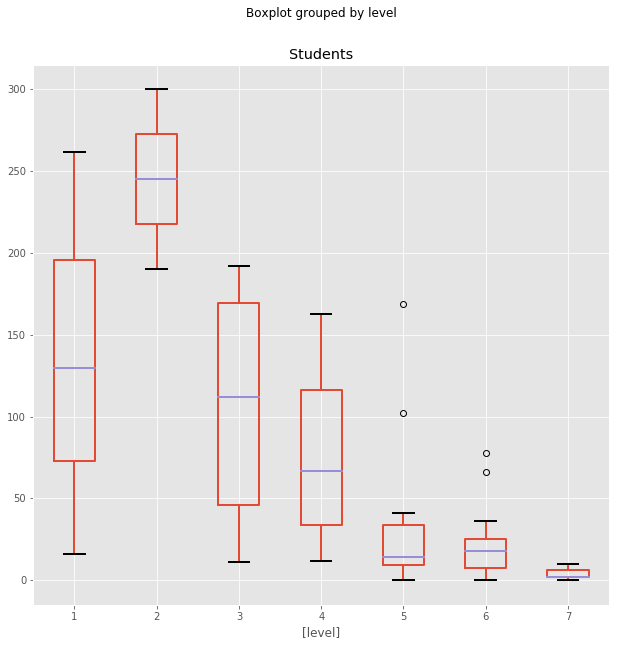

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
props = dict(linewidth=2)
# here we group by level
classes.boxplot(by='level', figsize=(10, 10),  boxprops=props, medianprops=props, whiskerprops=props, capprops=props)

An alternative way with separate figures:

1         AxesSubplot(0.1,0.679412;0.235294x0.220588)
2    AxesSubplot(0.382353,0.679412;0.235294x0.220588)
3    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
4         AxesSubplot(0.1,0.414706;0.235294x0.220588)
5    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
6    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
7             AxesSubplot(0.1,0.15;0.235294x0.220588)
dtype: object

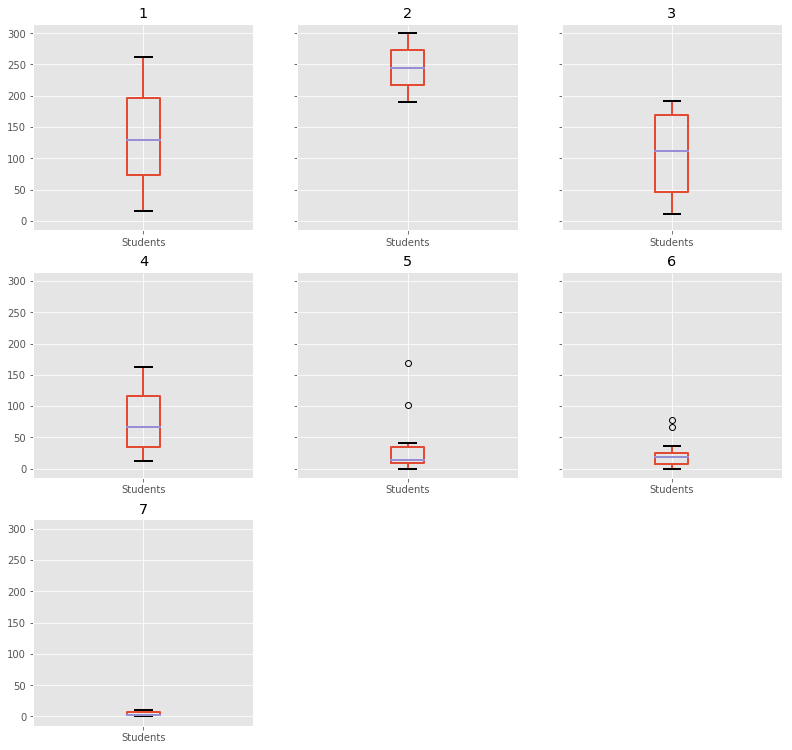

In [46]:
classes.groupby("level").boxplot(figsize=(13, 13), boxprops=props, medianprops=props, whiskerprops=props, capprops=props)

And plot a bar chart for the number of students in the class:

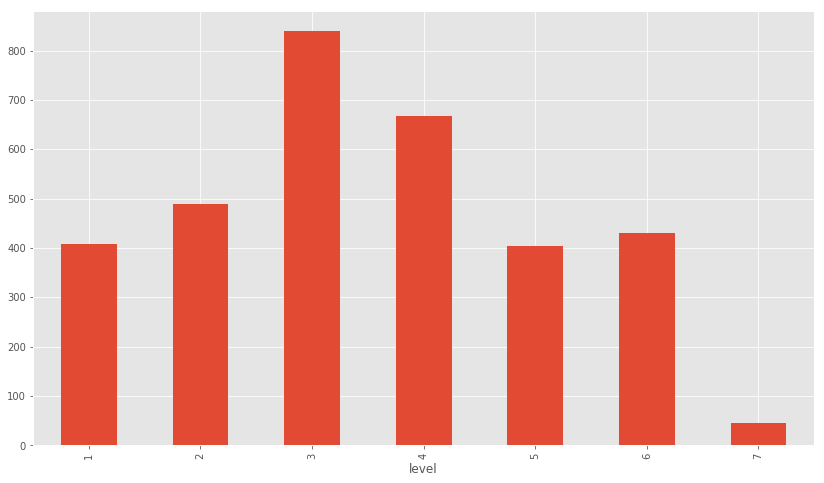

In [47]:
student_sum = classes.groupby("level").aggregate([np.sum])
student_sum.plot.bar(legend=False, figsize=(14, 8))

We can see that the most students are in the 3000 level and there is another peak at the 6000 level classes.

## Scraping Wrap-Up

Scraping is a way to get information from website that were not designed to make data accessible. As such, it can often be **brittle**: a website change will break your scraping script. It is also often not welcome, as a scaper can cause a lot of traffic. 

The way we scraped information here also made the **assumption that HTML is generated consistently** based just on the URL. That is, unfortunately, less and less common, as websites adapt to browser types, resolutions, locales, but also as a lot of content is loaded dynamically e.g., via web-sockets. For example, many websites now auotmatically load more data once you scroll to the bottom of the page. These websites couldn't be scraped with our approach, instead, a browser-emulation approach, using e.g., [Selenium]() would be necessary. [Here is a tutorial](https://medium.com/the-andela-way/introduction-to-web-scraping-using-selenium-7ec377a8cf72) on how to do that. 

Finally, many services make their data available through a well-defined interface, an API. Using an API is always a better idea than scraping, but scraping is a good fallback!

## Exercise 1: Exceptional Olympians

Scrape data from [this wikipedia site](https://en.wikipedia.org/wiki/List_of_multiple_Olympic_medalists) about exceptional Olympic medalists. 

1. Download the html using urllib. 
2. Parse this html with BeautifulSoup.
3. Extract the html that corresponds to the big table from the soup.
4. Parse the table into a pandas dataframe. Hint: both the "No." and the "Total." column use row-spans which are tricky to parse, both with a pandas reader and manually. For the purpose of this exercise, exclude all rows that are not easy to parse (the first one is Bjørn Dæhlie).
5. Create a table that shows for each country how many gold, silver, bronze, and total medals it won in that list.
